# Bird detector
This code is based on the tflearn example and has been expanded as I try new things.


Import libraries first relating to tflearn

In [1]:
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

import random #For random number generation
random.seed(1234)


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


## Import datasets
Use the Cifar 10 dataset full of tiny images

In [26]:
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()

Explore the data next:

In [3]:
type(X)
X.shape
X_test.shape
#type(Y)
#Y.shape

(10000, 32, 32, 3)

## Display sample images
The followin code will display sample images from the set

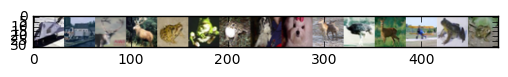

In [4]:
import matplotlib.pyplot as plt #import plotting library
import numpy as np #for array concatenation

indexes=random.sample(range(0, 50000-1), 15)


k=np.concatenate( (X[[indexes]] ), axis=1 )
k.shape
plt.imshow(k)
plt.rcParams['figure.figsize'] = (30.0, 20.0)
plt.show()

## Shuffle the data
The next code will shuffle the data points

In [5]:
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)
Y_test.shape

(10000, 10)

## Prepare the image pre-processing and data augmentation
The next code will define the pre-process and data augmentation (by adding rotation)

In [6]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

## Neural Network Definition
The followin section will build the neural network using tflearn.

In [7]:
# Convolutional network building
network = input_data(shape=[None, 32, 32, 3], #Define input layer
                     data_preprocessing=img_prep, #set data_preprocessing
                     data_augmentation=img_aug)

network = conv_2d(network, 32,3, activation='relu') #convolve data once
network = max_pool_2d(network,2) #down sample (reduce data)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network,2) #down sample (reduce data)
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)


## Train the neural network
In this case the training will be done for one epoch just to see how long it takes.

In [8]:
#Define the model
model = tflearn.DNN(network, tensorboard_verbose=0, checkpoint_path='bird-classifier1.tfl.ckpt')

In [9]:

model.fit(X, Y, n_epoch=15, 
          shuffle=True, 
          validation_set=(X_test, Y_test),
          show_metric=True, 
          batch_size=96, 
          run_id='cifar10_cnn')


Training Step: 7814  | total loss: 0.79961 | time: 431.260s
| Adam | epoch: 015 | loss: 0.79961 - acc: 0.7772 -- iter: 49920/50000
Training Step: 7815  | total loss: 0.77621 | time: 464.196s
| Adam | epoch: 015 | loss: 0.77621 - acc: 0.7776 | val_loss: 0.64747 - val_acc: 0.7772 -- iter: 50000/50000
--
INFO:tensorflow:C:\Users\Nick\Dropbox\Work\Data Science\02 - Fish Detector\SAMPLES\bird detector\bird-classifier1.tfl.ckpt-7815 is not in all_model_checkpoint_paths. Manually adding it.


## Load one of the models
Here another model can be loaded.

In [13]:

#model.load("bird-classifier1.tfl.ckpt-7815")

## Evaluate the strength of the model on test data
The next code blurb will take the X_test data and the Y_test data and see how much agreement there is between the two.

In [17]:
model.evaluate(X_test,Y_test)


[0.7772]

## Run the model on test data
This next section will take a random image and show the classification results.

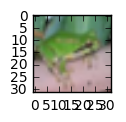

airplane   automobile bird       cat        deer       dog        frog       horse      ship       truck     
0.000007   0.000000   0.000452   0.000303   0.002780   0.000005   0.996452   0.000000   0.000000   0.000000


In [121]:
#pred=X_test[100]
#model.predict([pred])
test_index=random.randint(0,10000-1)
pred=X_test[test_index]
plt.rcParams['figure.figsize'] = (1, 1)
plt.imshow(pred)
plt.show()

prediction=model.predict([pred]) #Generate prediction

#Print the header information
LAYOUT_header = "{!s:10} {!s:10} {!s:10} {!s:10} {!s:10} {!s:10} {!s:10} {!s:10} {!s:10} {!s:10}"
header_list = ["airplane","automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(LAYOUT_header.format(*header_list))

#Print prediction numbers
LAYOUT = "{:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}   {:02.6f}"
print(LAYOUT.format(*prediction[0]))

